In [1]:
import importlib
import util
from util.plot_utils import plot_logs as plot_logs_old
importlib.reload(util.plot_utils)
from pathlib import Path, PurePath
import util
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from util.plot_utils import plot_logs
import torch
import os

Text(0, 0.5, 'mAP')

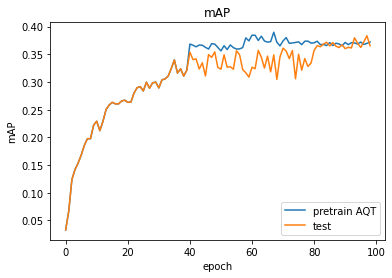

In [2]:
log_name = 'log.txt'
log_name_1  = [Path('exps_bs4_retrain/AQT_pretrain')]
# log_name_3  = [Path('exps_bs4_retrain/contrastive_ema_w_eps_thresh_0.9_tgt_proposal_reweight')]
# log_name_3  = [Path('test')]
log_name_3  = [Path('test_inter_intra')]

df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
# df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='test')
plt.plot(coco_eval_3, label='test')


plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

Text(0, 0.5, 'mAP')

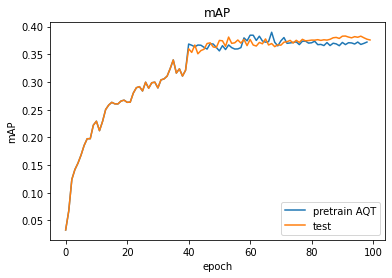

In [4]:
log_name = 'log.txt'
log_name_1  = [Path('exps_bs4_retrain/AQT_pretrain')]
# log_name_3  = [Path('exps_bs4_retrain/contrastive_ema_w_eps_thresh_0.9_tgt_proposal_reweight')]
# log_name_3  = [Path('test')]
log_name_3  = [Path('debugging_tests/test_zero_init')]

df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
# df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='test')
plt.plot(coco_eval_3, label='test')


plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## observe inter class loss

/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:92: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  import pdb; pdb.set_trace()
/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:92: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  import pdb; pdb.set_trace()
/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:75: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  coco_eval = pd.DataFrame(pd.np.stack(df.test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=ewm_col).mean

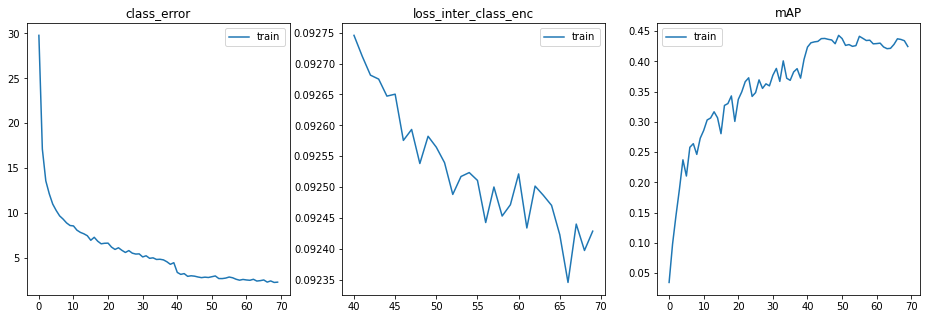

In [21]:
logs = [Path('exps_bs4_retrain_new/multi_scale_inter_loss_first_layer_0.1')]
# fields = ('loss_inter_class_enc',) # correct way to pass fields
plot_logs(logs, mode='train')

/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:92: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  import pdb; pdb.set_trace()
/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:92: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  import pdb; pdb.set_trace()
/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:75: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  coco_eval = pd.DataFrame(pd.np.stack(df.test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=ewm_col).mean

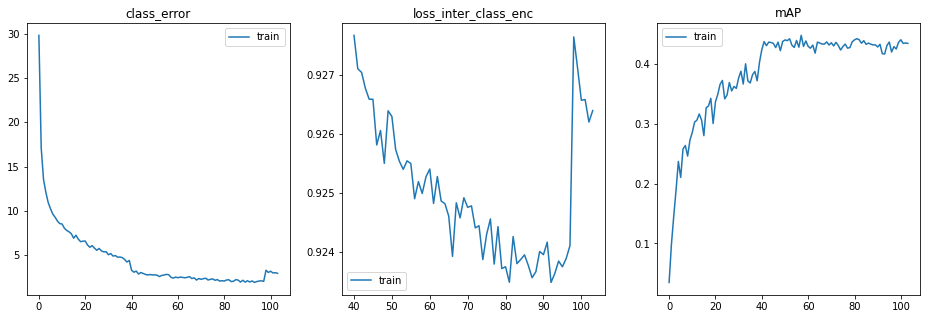

In [22]:
logs = [Path('exps_bs4_retrain_new/multi_scale_inter_loss_first_layer')]
# fields = ('loss_inter_class_enc',) # correct way to pass fields
plot_logs(logs, mode='train')

/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:92: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:92: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:75: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  coco_eval = pd.DataFrame(pd.np.stack(df.test_coco_eval_bbox.dropna(

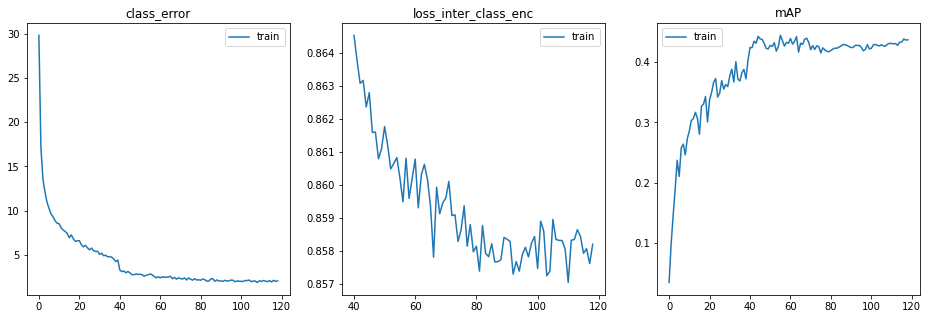

In [7]:
logs = [Path('exps_bs4_retrain_new/multi_scale_inter_loss_first_layer_pow')]
plot_logs(logs, mode='train')

## cross scale exp bs4

## multi-scale exp bs4

Text(0, 0.5, 'mAP')

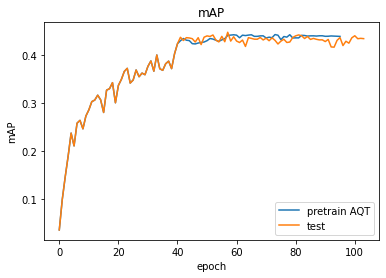

In [27]:
log_name = 'log.txt'
log_name_1  = [Path('exps_bs4_retrain/AQT_pretrain_multi_scale')]
# log_name_2 = [Path('exps_bs4_retrain_new/multi_scale_inter_loss_intra_loss_first_layer')]
# log_name_2 = [Path('exps_bs4_retrain_new/multi_scale_inter_loss_single_scale_proto')]
log_name_2 = [Path('exps_bs4_retrain_new/multi_scale_inter_loss_first_layer')]

# log_name_2 = [Path('exps_bs4_retrain_new/multi_scale_inter_loss_only')]
# log_name_2 = [Path('exps_bs4_retrain_new/multi_scale_inter_loss_intra_loss_first_layer')]
# log_name_2 = [Path('exps_bs4_retrain_new/multi_scale_inter_loss_first_layer_0.1')]
# log_name_2 = [Path('exps_bs4_retrain_new/multi_scale_inter_loss_first_layer_pow')]
# log_name_2 = [Path('exps_bs4_retrain_new/multi_scale_inter_loss_first_layer_from_scratch')]
# log_name_2 = [Path('exps_bs4_retrain_new/multi_scale_inter_loss_cross_scale')]

 

df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]


coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
plt.plot(coco_eval_2, label='test')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

Text(0, 0.5, 'mAP')

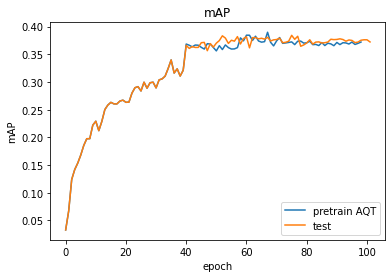

In [4]:
log_name = 'log.txt'
log_name_1  = [Path('exps_bs4_retrain/AQT_pretrain')]
# log_name_3  = [Path('exps_bs4_retrain/contrastive_ema_w_eps_thresh_0.9_tgt_proposal_reweight')]
# log_name_3  = [Path('exps_bs4_retrain_new/single_scale_inter_loss_bg_loss')]
log_name_3  = [Path('exps_bs4_retrain_new/single_scale_inter_loss_only')]
# log_name_3  = [Path('exps_bs4_retrain_new/single_scale_inter_loss_intra_loss')]

df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
# df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='test')
plt.plot(coco_eval_3, label='test')


plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## bs4 retrain tgt reweight

Text(0, 0.5, 'mAP')

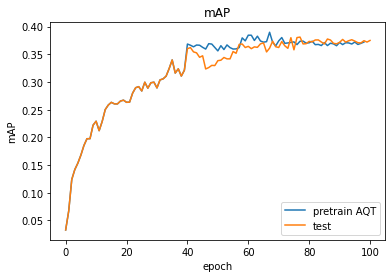

In [5]:
log_name = 'log.txt'
log_name_1  = [Path('exps_bs4_retrain/AQT_pretrain')]
# log_name_3  = [Path('exps_bs4_retrain/contrastive_ema_w_eps_thresh_0.9_tgt_proposal_reweight')]
log_name_3  = [Path('exps_bs4_retrain/test1_bg_and_fixed_thresh')]
# log_name_3  = [Path('exps_bs4_retrain/test1')]

df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
# df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='test')
plt.plot(coco_eval_3, label='test')


plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## bs4 retrain tgt reweight loss reweighted (smaller losses)

Text(0, 0.5, 'mAP')

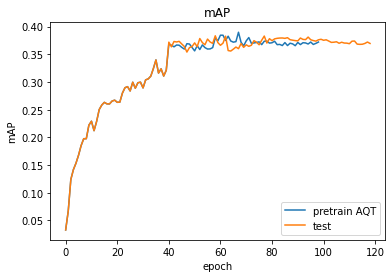

In [6]:
log_name = 'log.txt'
log_name_1  = [Path('exps_bs4_retrain/AQT_pretrain')]
log_name_3  = [Path('exps_bs4_retrain/test1_bg_and_fixed_thresh_get_proto')]

df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
# df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='test')
plt.plot(coco_eval_3, label='test')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## bs4 retrain tgt reweight loss reweighted (balanced)

Text(0, 0.5, 'mAP')

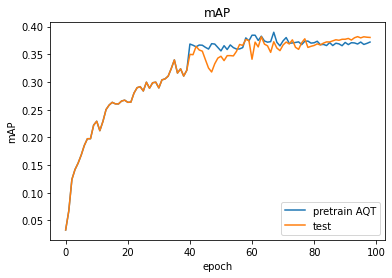

In [7]:
log_name = 'log.txt'
log_name_1  = [Path('exps_bs4_retrain/AQT_pretrain')]
log_name_3  = [Path('exps_bs4_retrain/test1_bg_and_fixed_thresh_calibrated_balanced_weight')]

df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
# df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='test')
plt.plot(coco_eval_3, label='test')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## bs4 retrain tgt reweight w/ calibrated prototypes

In [ ]:
log_name = 'log.txt'
log_name_1  = [Path('exps_bs4_retrain/AQT_pretrain')]
log_name_3  = [Path('exps_bs4_retrain/test1_bg_and_fixed_thresh_calibrated_intra_reweight')]

df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
# df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='test')
plt.plot(coco_eval_3, label='test')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

In [ ]:
log_name = 'log.txt'
log_name_1  = [Path('exps_bs4_retrain/AQT_pretrain')]
log_name_3  = [Path('exps_bs4_retrain/test1_w_bg_calibrated')]

df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
# df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='test')
plt.plot(coco_eval_3, label='test')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## bs4 retrain tgt reweight w/ calibrated prototypes

In [ ]:
log_name = 'log.txt'
log_name_1  = [Path('exps_bs4_retrain/AQT_pretrain')]
log_name_3  = [Path('exps_bs4_retrain/test1_bg_and_fixed_thresh_calibrated')]

df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
# df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='test')
plt.plot(coco_eval_3, label='test')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## normalized results

In [ ]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'
log_name_1  = [Path('exps/pretrain_AQT')]
# log_name_2  = [Path('exps_retrain_normalize/contrastive_retrain_from_AQT_39_tgt_proposal_reweight_decreasing_thresh')]
# log_name_3  = [Path('exps_retrain_normalize/contrastive_retrain_from_AQT_39_tgt_proposal_reweight_fixed_thresh')]
# log_name_4  = [Path('exps_retrain_normalize/contrastive_retrain_from_AQT_39_w_decay_lr_fixed_thresh_normalize_enc')]
log_name_5  = [Path('exps_retrain_normalize/exps_bs4/contrastive_ema')]


# df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
# df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
# df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]
# df_4 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_4]
df_5 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_5]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_4 = pd.DataFrame(np.stack(df_4[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_5 = pd.DataFrame(np.stack(df_5[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [ ]:
# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='normalized target proposal reweight decreasing thresh normalize')
# plt.plot(coco_eval_3, label='normalized target proposal reweight fixed thresh normalize')
# plt.plot(coco_eval_4, label='normalized target proposal reweight fixed thresh normalize')
plt.plot(coco_eval_5, label='contrastive ema')


plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## decoder testing

In [ ]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'
log_name_1  = [Path('exps/pretrain_AQT')]
log_name_2  = [Path('exps_retrain/contrastive_retrain_from_AQT_39_w_decay_lr_fixed_thresh_dec')]

df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [ ]:
# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
plt.plot(coco_eval_2, label='contrastive ema fixed thresh decoder')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## target proposal reweight

In [ ]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'
log_name_1  = [Path('exps/pretrain_AQT')]
log_name_2  = [Path('exps_retrain/contrastive_retrain_from_AQT_39_tgt_proposal_reweight')]
log_name_3  = [Path('exps_retrain/contrastive_retrain_from_AQT_39_tgt_proposal_reweight_fixed_thresh')]


df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]



coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [ ]:
# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='target proposal reweighting linear decreasing')
plt.plot(coco_eval_3, label='target proposal reweighting fixed threshold')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## contrastive ema continued from AQT 39 epochs

In [ ]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'
log_name_1  = [Path('exps/pretrain_AQT')]
# log_name_2  = [Path('exps_retrain/contrastive_retrain_from_AQT_39_w_decay_lr_fixed_thresh')]
# log_name_3  = [Path('exps_retrain/contrastive_retrain_from_AQT_39_original_lr_loss_reweighted')]
log_name_4  = [Path('exps_retrain/contrastive_retrain_from_AQT_39_w_decay_lr_fixed_thresh_loss_reweighted')]
# log_name_5  = [Path('exps_retrain/test')]

df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
# df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
# df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]
df_4 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_4]
# df_5 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_5]


coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_4 = pd.DataFrame(np.stack(df_4[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_5 = pd.DataFrame(np.stack(df_5[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [ ]:
# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='contrastive ema w /decayed lr reweighted loss')
# plt.plot(coco_eval_3, label='contrastive ema w/ original lr')
# plt.plot(coco_eval_4, label='contrastive ema w/ decayed lr')
plt.plot(coco_eval_5, label='test')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## source performance

In [ ]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'
log_name_1  = [Path('exps/pretrain_AQT')]
log_name_2  = [Path('exps/pretrain_source')]


df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]


coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [ ]:
# checking old and new baseline model trained
# plt.plot(coco_eval_1, label='pretrain AQT')
plt.plot(coco_eval_1, label='AQT')
plt.plot(coco_eval_2, label='AQT source')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## delayed lr drop exp (my exp)

In [ ]:
# currently trying this to see if larger learning rate encourages learning with our method,
# assuming everything predefined has a resonable validity

In [ ]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'
log_name_1  = [Path('exps/pretrain_AQT')]
log_name_2  = [Path('exps_lr_drop_60/aqt_lr_drop_60')]
log_name_3 = [Path('exps_diff_lr_schedule/contrastive_ema')]
log_name_4 = [Path('exps_lr_drop_60/contrastive_ema_lr_drop_60_fixed_thresh')]

df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]
df_4 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_4]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_4 = pd.DataFrame(np.stack(df_4[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [ ]:
# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='lr_drop 60')
# plt.plot(coco_eval_3, label='lr_drop 60 contrastive ema')
plt.plot(coco_eval_4, label='lr_drop 60 contrastive ema fixed thresh')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## retraining methods

In [ ]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'

log_name_1  = [Path('exps/pretrain_AQT')]
# log_name_2 = [Path('exps_retrain/all_align_false')] # freeze layers
# log_name_2 = [Path('exps_retrain/space_channel_align_false')] # freeze layers

### freeze all layers except encoder, update encoder with contrastive loss, detection loss, space and channel alignment losses
# log_name_2 = [Path('exps_retrain/instance_align_false')] 
### freeze all layers except encoder, update eocoder contrastive loss, detection loss and all alignment losses
# log_name_2 = [Path('exps_retrain/contrastive_retrain_from_AQT_99')]
log_name_2 = [Path('exps_retrain/contrastive_retrain_from_AQT_99_w_old_lrs')]
df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [ ]:
# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
plt.plot(coco_eval_2, label='contrastive ema')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## all layer prototype aggregation

In [ ]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'

log_name_1 = log_name_1 = [Path('exps/pretrain_AQT')]
log_name_2 = [Path('exps1/test')]
df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [ ]:
# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
plt.plot(coco_eval_2, label='contrastive ema')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## single scale

In [ ]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'

log_name_1 = log_name_1 = [Path('exps/pretrain_AQT')]
log_name_2 = [Path('exps/test_15_epoch')]
df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [ ]:
# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
plt.plot(coco_eval_2, label='contrastive ema')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

In [ ]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'

log_name_1 = log_name_1 = [Path('exps/pretrain_AQT')]
# log_name_2 = [Path('exps/test_15_epoch_wo_instance_align')]
log_name_3 = [Path('exps/exp_0202/exp_1')]
df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
# df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [ ]:
# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='contrastive ema wo instance')
plt.plot(coco_eval_3, label='prototype aggregate')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

# decoder

In [ ]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'

log_name_1 = log_name_1 = [Path('exps/pretrain_AQT')]
# log_name_2 = [Path('exps/test_15_epoch_wo_instance_align')]
log_name_3 = [Path('exps/test_15_epoch_dec_bs4')]
df_1 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_1]
# df_2 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_2]
df_3 = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_3]

coco_eval_1 = pd.DataFrame(np.stack(df_1[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
# coco_eval_2 = pd.DataFrame(np.stack(df_2[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_3 = pd.DataFrame(np.stack(df_3[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [ ]:
# checking old and new baseline model trained
plt.plot(coco_eval_1, label='pretrain AQT')
# plt.plot(coco_eval_2, label='contrastive ema wo instance')
plt.plot(coco_eval_3, label='prototype aggregate')

plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## cross scale